## Question 1
- Read data from `Crime.csv` then print the names of the columns which have missing values.
- Drop any row that has missing values.
- Which three subcategories have the top three event counts?

In [10]:
#Your Code Here
import pandas as pd

df = pd.read_csv('Crime.csv')
list(df.columns[df.isna().sum() > 0])

['Occurred Date',
 'Occurred Time',
 'Reported Time',
 'Crime Subcategory',
 'Precinct',
 'Sector',
 'Beat']

In [11]:
#Your Code Here

dropped = df.dropna(axis = 0)

In [12]:
#Your Code Here

dropped["Crime Subcategory"].value_counts().head(3)

Crime Subcategory
CAR PROWL          144128
THEFT-ALL OTHER     52389
THEFT-SHOPLIFT      47227
Name: count, dtype: int64

## Question 2
- Create two new columns (these two columns should be datetime objects):
    - `Occurred DateTime`= `Occurred Date` + `Occurred Time` 
    - `Reported DateTime` = `Reported Date` + `Reported Time` 
- Delete the following columns: `Occurred Date`, `Occurred Time`, `Reported Date`, `Reported Time`

- **Hints**: 
    - The panadas function **pd.to_datetime** can help
    - The loaded Occurred/Reported Time appears to be a float like '1930.0'. This should be interpreted as '19:30:00' eventually

In [13]:
#Your Code Here

dropped['Occurred Time'] = dropped['Occurred Time'].apply(lambda x: f"{int(x/100):02d}:{int(x)%100:02d}:00" if pd.notna(x) else None)
dropped['Reported Time'] = dropped['Reported Time'].apply(lambda x: f"{int(x/100):02d}:{int(x)%100:02d}:00" if pd.notna(x) else None)

dropped['Occurred DateTime'] = pd.to_datetime(dropped['Occurred Date'] + ' ' + dropped['Occurred Time'])
dropped['Reported DateTime'] = pd.to_datetime(dropped['Reported Date'] + ' ' + dropped['Reported Time'])

dropped

/var/folders/kx/58cjbwzx5jjgn5w_sjz3qk0w0000gn/T/ipykernel_13488/2101154760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['Occurred Time'] = dropped['Occurred Time'].apply(lambda x: f"{int(x/100):02d}:{int(x)%100:02d}:00" if pd.notna(x) else None)
/var/folders/kx/58cjbwzx5jjgn5w_sjz3qk0w0000gn/T/ipykernel_13488/2101154760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['Reported Time'] = dropped['Reported Time'].apply(lambda x: f"{int(x/100):02d}:{int(x)%100:02d}:00" if pd.notna(x)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred DateTime,Reported DateTime
0,20110000389222,11/29/2001,12:00:00,12/03/2011,13:14:00,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00
1,20160000201733,06/01/2004,00:00:00,06/07/2016,11:26:00,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00
2,20060000308915,07/25/2006,15:36:00,07/25/2006,15:36:00,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00
3,2009000018704,09/30/2007,15:30:00,01/15/2009,18:20:00,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00
4,2008000054923,09/30/2007,00:00:00,02/11/2008,15:32:00,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509229,20190000900500,01/14/2019,02:00:00,01/14/2019,09:33:00,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE,2019-01-14 02:00:00,2019-01-14 09:33:00
509230,2019000017935,01/14/2019,01:43:00,01/14/2019,09:22:00,BURGLARY-COMMERCIAL,BURGLARY-FORCE-NONRES,NORTH,B,B3,WALLINGFORD,2019-01-14 01:43:00,2019-01-14 09:22:00
509231,2019000017609,01/14/2019,00:53:00,01/14/2019,00:54:00,NARCOTIC,NARC-SELL-COCAINE,WEST,D,D1,SLU/CASCADE,2019-01-14 00:53:00,2019-01-14 00:54:00
509232,2019000017601,01/14/2019,00:45:00,01/14/2019,00:45:00,NARCOTIC,NARC-POSSESS-COCAINE,WEST,K,K3,CHINATOWN/INTERNATIONAL DISTRICT,2019-01-14 00:45:00,2019-01-14 00:45:00


In [14]:
#Your Code Here

dropped = dropped.drop(columns=['Occurred Date', 'Occurred Time', 'Reported Date', 'Reported Time'])

## Question 3

- The crime subcategories are too fine-grained for our analysis. So regroup several subcategories together into 8 major categories: `[Thefts, Burglary, Robbery, Alcohol_Drug, Sex_Related, Homicide, Misc]`

- Construct a mapping dictionary from the subcategories to the corresponding major crime types, then use it by creating a new column called `crime_type`.
mapping dictionary.:
    - For example, we would like to map `CAR PROWL`, `MOTOR VEHICLE THEFT`, ... to `thefts`.
    - We would like to map `ROBBERY-STREET`, `ROBBERY-RESIDENTIAL`,... to `robbery`, etc.
    
**hint**: you can use df[col].map to map a column to values in a dictionary

In [16]:
#Your Code Here
mappingDict={
    'MOTOR VEHICLE THEFT': 'Thefts',
    'THEFT-ALL OTHER': 'Thefts',
    'THEFT-BUILDING': 'Thefts',
    'THEFT-BICYCLE': 'Thefts',
    'THEFT-SHOPLIFT': 'Thefts',
    'BURGLARY-COMMERCIAL': 'Burglary',
    'BURGLARY-RESIDENTIAL-SECURE PARKING': 'Burglary',
    'BURGLARY-COMMERCIAL-SECURE PARKING': 'Burglary',
    'BURGLARY-RESIDENTIAL': 'Burglary',
    'ROBBERY-STREET': 'Robbery',
    'ROBBERY-RESIDENTIAL': 'Robbery',
    'ROBBERY-COMMERCIAL': 'Robbery',
    'LIQUOR LAW VIOLATION': 'Alcohol_Drug',
    'DUI': 'Alcohol_Drug',
    'RAPE': 'Sex_Related',
    'PROSTITUTION': 'Sex_Related',
    'SEX OFFENSE-OTHER': 'Sex_Related',
    'AGGRAVATED ASSAULT-DV': 'Sex_Related',
    'AGGRAVATED ASSAULT': 'Sex_Related',
    'PORNOGRAPHY': 'Sex_Related',
    'HOMICIDE': 'Homicide',
    'CAR PROWL': 'Misc',
    'WEAPON': 'Misc',
    'ARSON': 'Misc',
    'GAMBLE': 'Misc',
    'DISORDERLY CONDUCT': 'Misc',
    'FAMILY OFFENSE-NONVIOLENT': 'Misc',
    'LOITERING': 'Misc',
    'TRESPASS': 'Misc',
    'NARCOTIC': 'Alcohol_Drug'
}
#Your Code Here

dropped['crime_type'] = dropped['Crime Subcategory'].map(lambda x: mappingDict[x])


"""
Could have used this
dropped['crime_type'] = dropped['Crime Subcategory'].map(mapping_dict)
But just added the last 2 in the dictionary manyally
"""



"\nCould have used this\ndropped['crime_type'] = dropped['Crime Subcategory'].map(mapping_dict)\nBut just added the last 2 in the dictionary manyally\n"

## Question 4
- Compare `visually` the average time gap between **Reported DateTime** vs **Occurred DateTime** of different crimes types.

**Hints**: 
- You can get the time in seconds from datetime column using `df[col_name].dt.total_seconds()`.
- You can convert seconds to datetime usine `pd.to_timedelta(df["sec"], unit='s')`

<Axes: xlabel='crime_type', ylabel='time_gap_hours'>

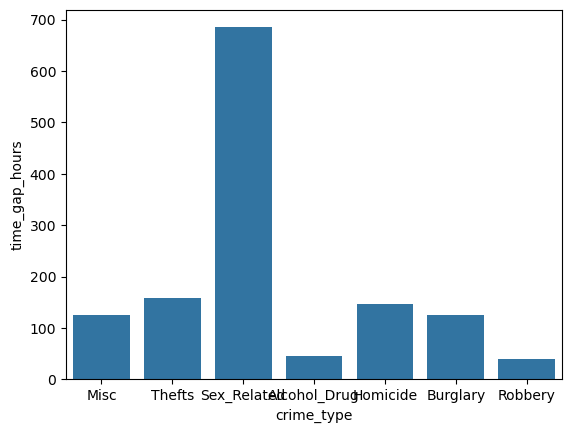

In [17]:
#Your Code Here
import seaborn as sns
import matplotlib.pyplot as plt

dropped['time_gap_seconds'] = (dropped['Reported DateTime'] - dropped['Occurred DateTime']).dt.total_seconds()
dropped['time_gap_hours'] = pd.to_timedelta(dropped['time_gap_seconds'], unit='s') / pd.Timedelta(hours=1)
time_gap_by_crime = dropped.groupby('crime_type')['time_gap_hours'].mean().sort_values()

sns.barplot(x='crime_type', y='time_gap_hours', data=dropped, estimator='mean', errorbar=None)


## Question 5
- Show `visually` the top 5 most dangerous neighorhood in the EAST Precinct (with number of crime events in each neighorhood)

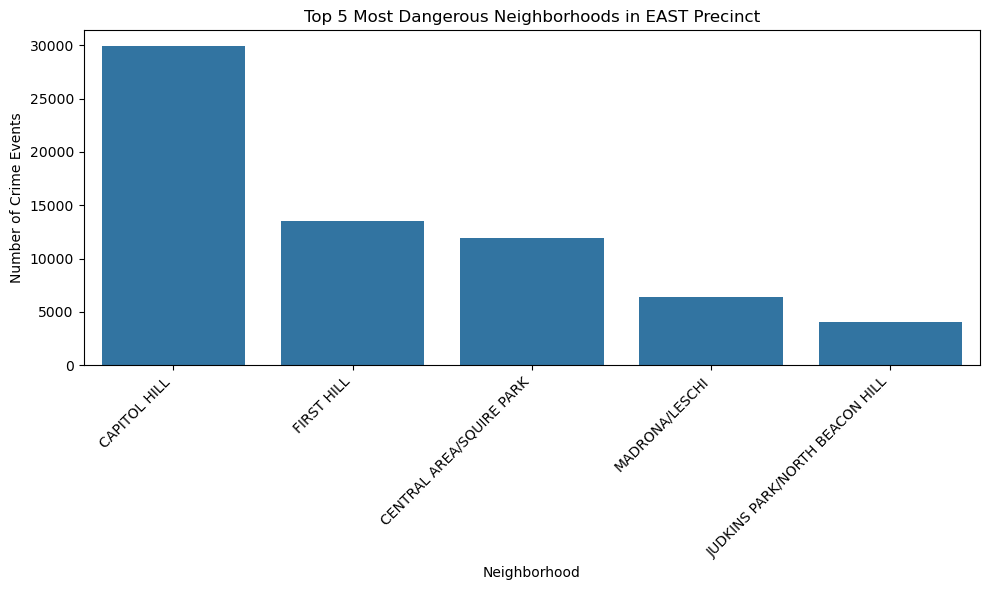

In [8]:
#Your Code Here

eastDf = dropped[dropped['Precinct'] == 'EAST']


neighborhood_counts = eastDf['Neighborhood'].value_counts().head(5)

plt.figure(figsize=(10, 6))  # Set figure size for better visibility
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values)

# Customize the plot
plt.title('Top 5 Most Dangerous Neighborhoods in EAST Precinct')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crime Events')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
# sns.barplot(x = neighborhood_counts.index, y = neighborhood_counts.values)

## Question 6
- Create column called **year** that shows the year of the crime. Which year has the lowest and highest crime event counts, respectively?
- Plot the number of `Thefts` crimes in the last ten years

In [23]:
#Your Code Here


dropped['year'] = dropped['Occurred DateTime'].dt.year
dropped.groupby('year').size().nlargest(3)

year
2018    50675
2017    49948
2014    49096
dtype: int64

<Axes: xlabel='year'>

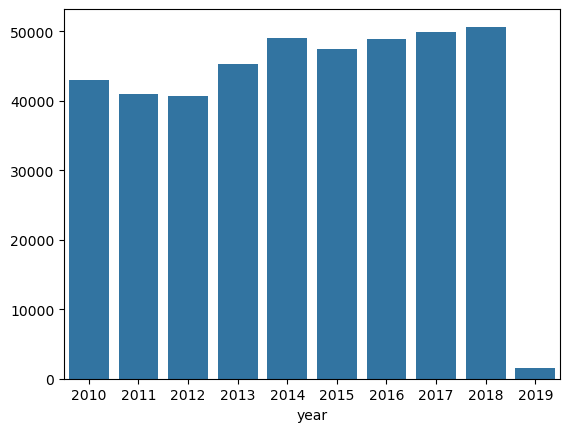

In [24]:
#Your Code Here

grouped = dropped.groupby('year').size()[-10:]
sns.barplot(x = grouped.index, y = grouped.values)

## Question 7
- keep only crime events occurred in-between **2008-2018** (remove all other crimes).
- Show `visually` which crime type has the highest percentage of events

In [25]:
#Your Code Here

filtered_df = dropped[(dropped['year'] >= 2008) & (dropped['year'] <= 2018)]

<Axes: xlabel='crime_type'>

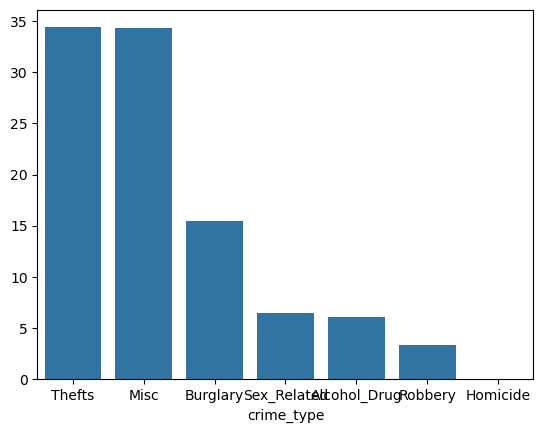

In [26]:
#Your Code Here

crime_counts = filtered_df['crime_type'].value_counts()
crime_percentages = crime_counts / crime_counts.sum() * 100

sns.barplot(x=crime_percentages.index, y=crime_percentages.values)

## Question 8
- Analyze the crime prevalence in terms of week days (create column called `day` that specifies the day of the crime).
- Which weekday (Sunday, Monday, ....Saturday) has highest/lowest daily Homicide crime count? (Visualize your findings)

**Hint:** use `.day_name()` with time object to get the day

In [27]:
#Your Code Here

dropped['day'] = dropped['Occurred DateTime'].dt.day_name()

<Axes: xlabel='day'>

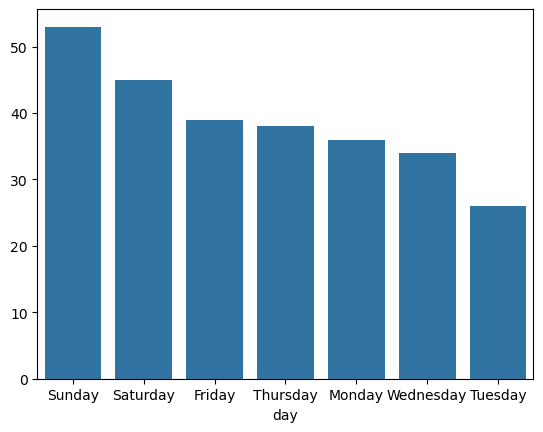

In [30]:
#Your Code Here

homicideData = dropped[dropped['crime_type'] == 'Homicide']
homicideByDay = homicideData['day'].value_counts()

sns.barplot(x=homicideByDay.index, y=homicideByDay.values)

## Extra Credit Questions

- Consider the 24 hours window into 6 frames '12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am'. Create a column called `Occured TimeFrame` that contains the crime occurred time frame.

- Compare `visually` time-frames in term of the number of crimes.
- Print the name of the most dangerous neighborhood in the WEST Precinct, Then Show `visually` the percentages of crimes during different TimeFrames in that neighborhood

In [33]:
# Your Code Here

def assign_timeframe(time):
    hour = time.hour
    if 0 <= hour < 4:
        return '12am-4am'
    elif 4 <= hour < 8:
        return '4am-8am'
    elif 8 <= hour < 12:
        return '8am-12pm'
    elif 12 <= hour < 16:
        return '12pm-4pm'
    elif 16 <= hour < 20:
        return '4pm-8pm'
    else:
        return '8pm-12am'

dropped['Occured TimeFrame'] = dropped['Occurred DateTime'].apply(lambda x: assign_timeframe(x))


<Axes: xlabel='Occured TimeFrame'>

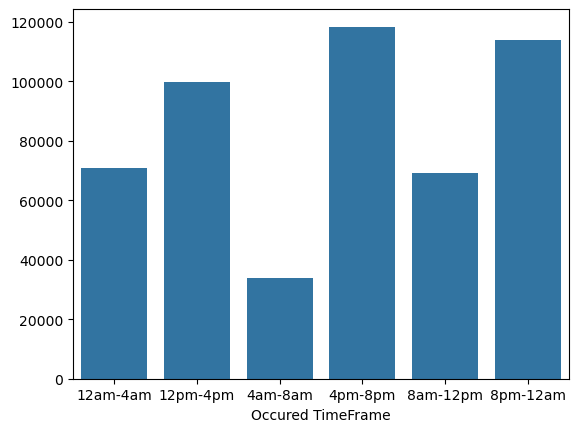

In [34]:
#Your Code Here

timeframe_counts = dropped['Occured TimeFrame'].value_counts().sort_index()
sns.barplot(x=timeframe_counts.index, y=timeframe_counts.values)




In [37]:
#Your Code Here

west_df = dropped[dropped['Precinct'] == 'WEST']

west_neighborhood_counts = west_df['Neighborhood'].value_counts()

most_dangerous_west = west_neighborhood_counts.idxmax()

print(most_dangerous_west)

DOWNTOWN COMMERCIAL


<Axes: xlabel='Occured TimeFrame'>

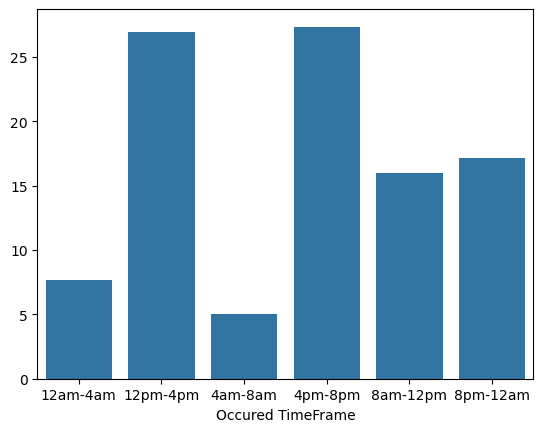

In [38]:
#Your Code Here

dangerous_hood_df = west_df[west_df['Neighborhood'] == most_dangerous_west]
timeframe_percentage = (dangerous_hood_df['Occured TimeFrame'].value_counts() / 
                        len(dangerous_hood_df) * 100).sort_index()

sns.barplot(x=timeframe_percentage.index, y=timeframe_percentage.values)

